### TEAM MsC Course - NTUA
### Biosignal acquisition and processing
### Assignement
##### Academic Year 2024-25


#  **EEG-Motion_Imaginary**
### **Table of contents**

**1. Raw data**

**2. Pre-processing**
  
  2.1. Data-framing
   
2.1.1.  Both

 2.1.2.  None

2.1.3. Visualization

2.2.  Filtering
   
 2.2.1.  Both

 2.2.2.  None

2.2.3. Visualization

**3. Feature Extraction**

 3.1. Both

 3.2. None

**4. Feature Validation**

4.1.  PSD

4.2.  Kurtosis

 4.3.  Skewness
   
   4.4.  Mean

   4.5.  Variance






**1. Raw data**

We begin the process by assuming the 20 discrete events as a whole, creating a unified .csv file per pilot. Uploading raw data and merging the csv files for each pilot, for each case (20 events made into one).
After that, we transpose that file for our own convenience.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir_both = '/content/drive/MyDrive/Master/Examination_directory/both'
output_dir_both = '/content/drive/MyDrive/Master/Examination_directory/output_both'
base_dir_none = '/content/drive/MyDrive/Master/Examination_directory/none'
output_dir_none = '/content/drive/MyDrive/Master/Examination_directory/output_none'


In [ ]:
num_patients = 33
num_events = 20

In [ ]:
for patient_id in range(1, num_patients + 1):

    merged_data_both= []


    for event_id in range(1, num_events + 1):

        file_name = f'pilot{patient_id}_evnt{event_id}_session2_noisy.csv'
        file_path = os.path.join(base_dir_both, file_name)


        if os.path.exists(file_path):

            data = pd.read_csv(file_path, header=None)
            merged_data_both.append(data)
        else:
            print(f'File not found: {file_name}')


    if merged_data_both:
        combined_data = pd.concat(merged_data_both, axis=1)


        transposed_data = combined_data.T


        output_file = os.path.join(output_dir_both, f'pilot{patient_id}_merged.csv')
        transposed_data.to_csv(output_file, index=False, header=False)
        print(f'Processed and saved: {output_file}')
    else:
        print(f'No files found for pilot{patient_id}')

Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot1_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot2_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot3_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot4_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot5_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot6_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot7_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot8_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_both/pilot9_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/

In [ ]:

for patient_id in range(1, num_patients + 1):

    merged_data_none = []


    for event_id in range(1, num_events + 1):

        file_name = f'pilot{patient_id}_evnt{event_id}_session2_noisy.csv'
        file_path = os.path.join(base_dir_none, file_name)


        if os.path.exists(file_path):

            data = pd.read_csv(file_path, header=None)
            merged_data_none.append(data)
        else:
            print(f'File not found: {file_name}')


    if merged_data_none:
        combined_data = pd.concat(merged_data_none, axis=1)


        transposed_data = combined_data.T


        output_file = os.path.join(output_dir_none, f'pilot{patient_id}_merged.csv')
        transposed_data.to_csv(output_file, index=False, header=False)
        print(f'Processed and saved: {output_file}')
    else:
        print(f'No files found for pilot{patient_id}')

Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot1_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot2_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot3_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot4_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot5_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot6_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot7_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot8_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/output_none/pilot9_merged.csv
Processed and saved: /content/drive/MyDrive/Master/Examination_directory/

**2. Pre-processing**

For each case, we are going to create a dataframe which consists of timesteps (rows) and EEG channels (columns).

Following the previous configuration, in each cell of the Dataframe, we can locate the value measured from a specific channel, at a specific moment in time, during the experiment.


2.1. Data-framing

2.1.1. Both

In [ ]:
base_path_both = '/content/drive/MyDrive/Master/Examination_directory/output_both/'
file_template = 'pilot{}_merged.csv'
channel_names = [
    'Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1',
    'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9',
    'PO7', 'PO3', 'O1', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4',
    'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz',
    'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8',
    'P10', 'PO8', 'PO4', 'O2'
]


for pilot_num in range(1, 34):
    if pilot_num == 13:
        continue
    file_path = base_path_both + file_template.format(pilot_num)

    try:
        data = pd.read_csv(file_path, header=None).values
        df = pd.DataFrame(data, columns=channel_names)
        globals()[f'X_both_p{pilot_num}'] = df
        print(f"Loaded data for X_both_p{pilot_num}")
    except Exception as e:
        print(f"Error loading pilot{pilot_num}: {e}")

Loaded data for X_both_p1
Loaded data for X_both_p2
Loaded data for X_both_p3
Loaded data for X_both_p4
Loaded data for X_both_p5
Loaded data for X_both_p6
Loaded data for X_both_p7
Loaded data for X_both_p8
Loaded data for X_both_p9
Loaded data for X_both_p10
Loaded data for X_both_p11
Loaded data for X_both_p12
Loaded data for X_both_p14
Loaded data for X_both_p15
Loaded data for X_both_p16
Loaded data for X_both_p17
Loaded data for X_both_p18
Loaded data for X_both_p19
Loaded data for X_both_p20
Loaded data for X_both_p21
Loaded data for X_both_p22
Loaded data for X_both_p23
Loaded data for X_both_p24
Loaded data for X_both_p25
Loaded data for X_both_p26
Loaded data for X_both_p27
Loaded data for X_both_p28
Loaded data for X_both_p29
Loaded data for X_both_p30
Loaded data for X_both_p31
Loaded data for X_both_p32
Loaded data for X_both_p33


2.1.2. None

In [ ]:
base_path_none = '/content/drive/MyDrive/Master/Examination_directory/output_none/'
file_template = 'pilot{}_merged.csv'
channel_names = [
    'Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1',
    'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9',
    'PO7', 'PO3', 'O1', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4',
    'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz',
    'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8',
    'P10', 'PO8', 'PO4', 'O2'
]

for pilot_num in range(1, 34):
    if pilot_num == 13:
        continue
    file_path = base_path_none + file_template.format(pilot_num)

    try:
        data = pd.read_csv(file_path, header=None).values
        df = pd.DataFrame(data, columns=channel_names)
        globals()[f'X_none_p{pilot_num}'] = df
        print(f"Loaded data for X_none_p{pilot_num}")
    except Exception as e:
        print(f"Error loading pilot{pilot_num}: {e}")


Loaded data for X_none_p1
Loaded data for X_none_p2
Loaded data for X_none_p3
Loaded data for X_none_p4
Loaded data for X_none_p5
Loaded data for X_none_p6
Loaded data for X_none_p7
Loaded data for X_none_p8
Loaded data for X_none_p9
Loaded data for X_none_p10
Loaded data for X_none_p11
Loaded data for X_none_p12
Loaded data for X_none_p14
Loaded data for X_none_p15
Loaded data for X_none_p16
Loaded data for X_none_p17
Loaded data for X_none_p18
Loaded data for X_none_p19
Loaded data for X_none_p20
Loaded data for X_none_p21
Loaded data for X_none_p22
Loaded data for X_none_p23
Loaded data for X_none_p24
Loaded data for X_none_p25
Loaded data for X_none_p26
Loaded data for X_none_p27
Loaded data for X_none_p28
Loaded data for X_none_p29
Loaded data for X_none_p30
Loaded data for X_none_p31
Loaded data for X_none_p32
Loaded data for X_none_p33


2.1.3. Visualization

For demonstration, we are going to plot a signal before and after the preprocessing phase.
We will plot the signal for Pilot 21:



Text(0, 0.5, 'Amplitude (μV)')

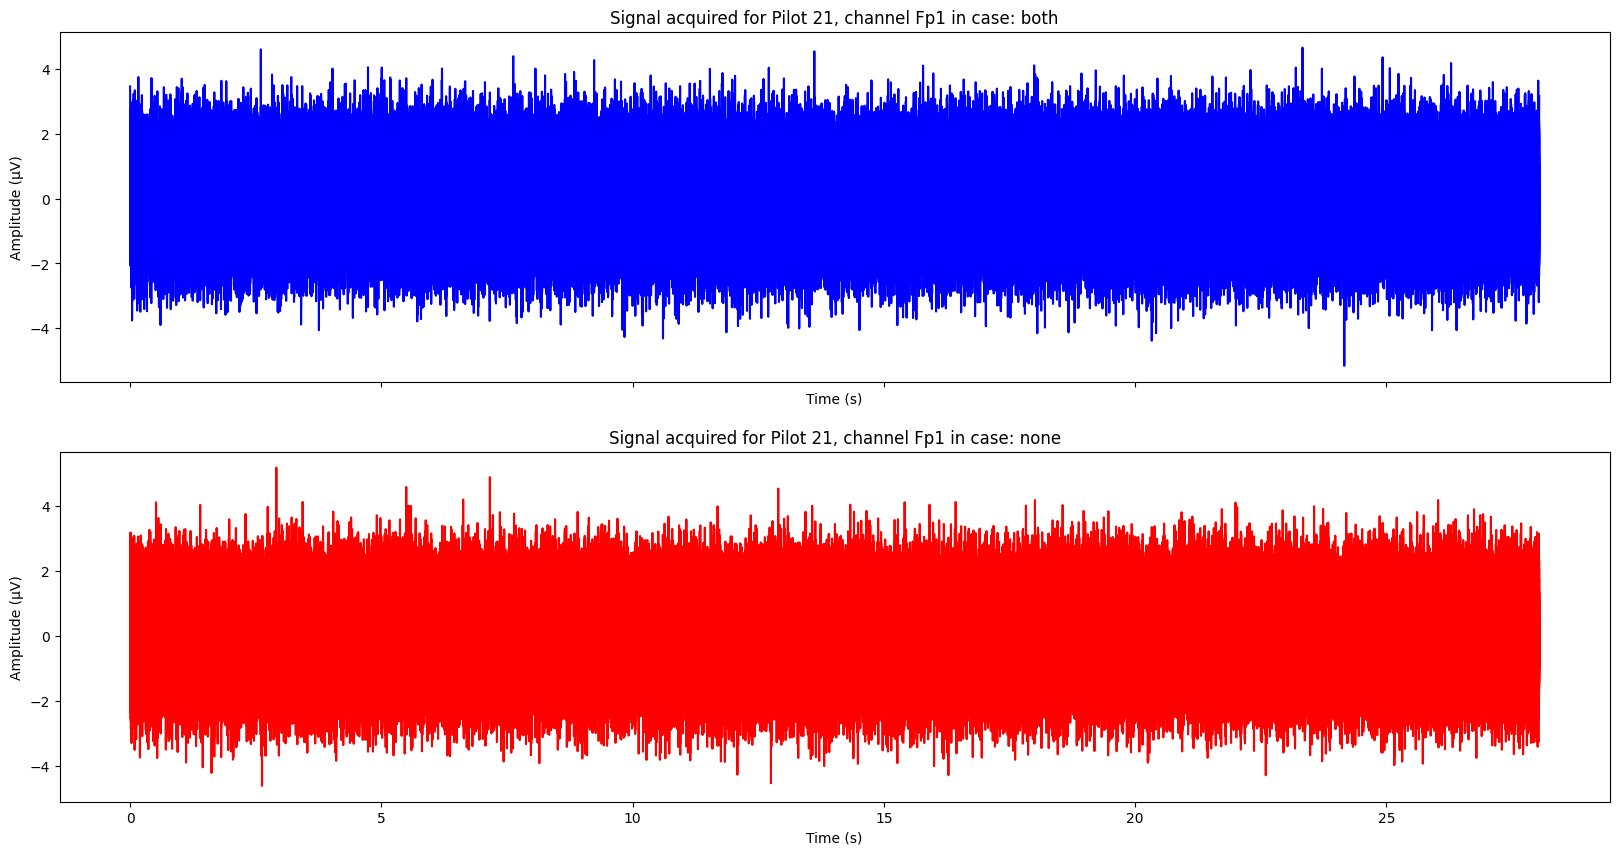

In [ ]:
T = len(X_none_p21)
time = np.arange(0, T) / 256
Xboth = X_both_p21.values
Xnone = X_none_p21.values
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (20, 10))
ax1.plot(time, Xboth, c ='b')
ax1.set_title('Signal acquired for Pilot 21, channel Fp1 in case: both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (μV)')
ax2.plot(time, Xnone, c ='r')
ax2.set_title('Signal acquired for Pilot 21, channel Fp1 in case: none')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude (μV)')

2.2. Filtering

We are going to apply the pre-processing principles, which consist of:


*  Applying a Finite Impulse Response (FIR) filter, which will isolate the band of frequencies of interest (1-35 Hz). We are going to apply a Butterworth Filter
*   Baseline Removal: Computing the mean value for each channel (column-wise) and then subtracting it from each cell.
*   Detrending: Removal of any possible trends observed in the procedure, as we would like to see subtrends in the data that are seasonal or cyclical, more easily.



In [ ]:
from scipy.signal import butter, filtfilt, detrend
from scipy.stats import skew, kurtosis

2.2.1. Both

In [ ]:
fs = 256

def bandpass_filter(data, lowcut=1, highcut=35, fs=256, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', output='ba')
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data

pilot_variables_both = [f'X_both_p{i}' for i in range(1, 34) if i != 13]

# Preprocessing

for var_name_both in pilot_variables_both:
    data = globals()[var_name_both]

    filtered_data = bandpass_filter(data.values, lowcut=1, highcut=35, fs=fs)

    detrended_data = detrend(filtered_data, axis=0)

    baseline_removed_data = detrended_data - detrended_data.mean(axis=0)

    globals()[var_name_both] = pd.DataFrame(baseline_removed_data, columns=data.columns)
    print(f"Processed {var_name_both}")

Processed X_both_p1
Processed X_both_p2
Processed X_both_p3
Processed X_both_p4
Processed X_both_p5
Processed X_both_p6
Processed X_both_p7
Processed X_both_p8
Processed X_both_p9
Processed X_both_p10
Processed X_both_p11
Processed X_both_p12
Processed X_both_p14
Processed X_both_p15
Processed X_both_p16
Processed X_both_p17
Processed X_both_p18
Processed X_both_p19
Processed X_both_p20
Processed X_both_p21
Processed X_both_p22
Processed X_both_p23
Processed X_both_p24
Processed X_both_p25
Processed X_both_p26
Processed X_both_p27
Processed X_both_p28
Processed X_both_p29
Processed X_both_p30
Processed X_both_p31
Processed X_both_p32
Processed X_both_p33


2.2.2. None

In [ ]:

pilot_variables_none = [f'X_none_p{i}' for i in range(1, 34) if i != 13]

# Preprocessing

for var_name_none in pilot_variables_none:

    data = globals()[var_name_none]

    filtered_data = bandpass_filter(data.values, lowcut=1, highcut=35, fs=fs)

    detrended_data = detrend(filtered_data, axis=0)

    baseline_removed_data = detrended_data - detrended_data.mean(axis=0)

    globals()[var_name_none] = pd.DataFrame(baseline_removed_data, columns=data.columns)
    print(f"Processed {var_name_none}")

Processed X_none_p1
Processed X_none_p2
Processed X_none_p3
Processed X_none_p4
Processed X_none_p5
Processed X_none_p6
Processed X_none_p7
Processed X_none_p8
Processed X_none_p9
Processed X_none_p10
Processed X_none_p11
Processed X_none_p12
Processed X_none_p14
Processed X_none_p15
Processed X_none_p16
Processed X_none_p17
Processed X_none_p18
Processed X_none_p19
Processed X_none_p20
Processed X_none_p21
Processed X_none_p22
Processed X_none_p23
Processed X_none_p24
Processed X_none_p25
Processed X_none_p26
Processed X_none_p27
Processed X_none_p28
Processed X_none_p29
Processed X_none_p30
Processed X_none_p31
Processed X_none_p32
Processed X_none_p33


2.2.3. Visualization

After the preprocessing procedure, the signals acquired for Pilot 21, Channel Fp1 in both and none cases will look like:

Text(0, 0.5, 'Amplitude (μV)')

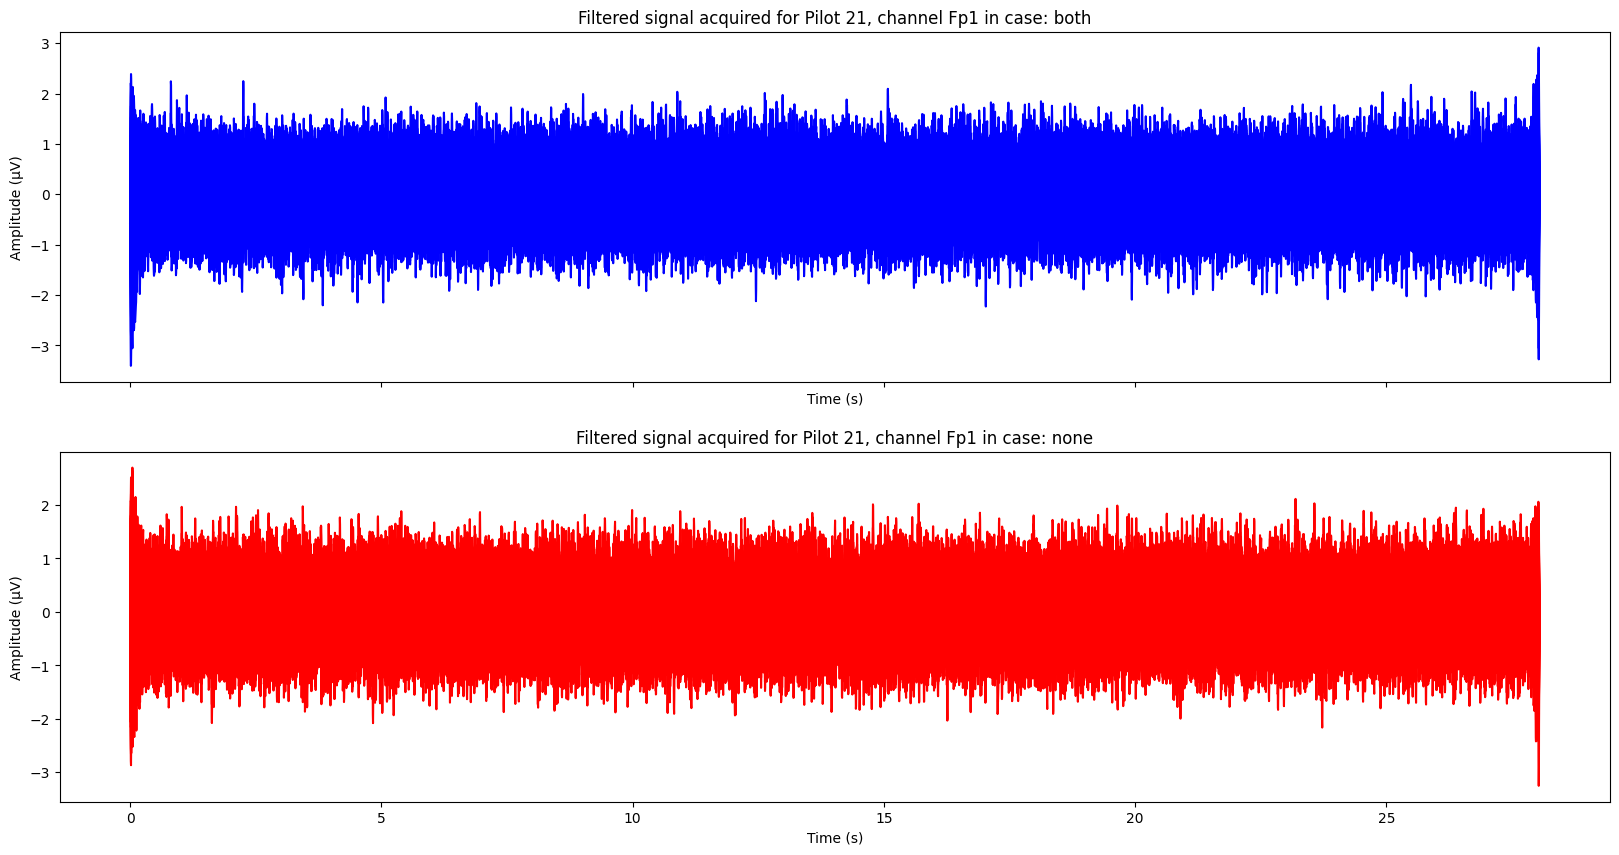

In [ ]:
Xboth = X_both_p21.values
Xnone = X_none_p21.values
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (20, 10))
ax1.plot(time, Xboth, c ='b')
ax1.set_title('Filtered signal acquired for Pilot 21, channel Fp1 in case: both')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (μV)')
ax2.plot(time, Xnone, c ='r')
ax2.set_title('Filtered signal acquired for Pilot 21, channel Fp1 in case: none')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude (μV)')

**3. Feature extraction**

We begin by initializing the discrete bands of frequencies, in order to examine potential features in these frequency sub-domains.

After that, we are going to compute the following quantities for each condition of both and none for each pilot in each band for every channel.

The features we will be working with are:
*   Power Spectral Density (PSD)
*   Kurtosis
*   Skewness
*   Mean
*   Variance

Finaly, we saved the extracted data, for the purpose of the next step, which is Feature Validation.




3.1. Both

In [ ]:
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 35)
}

psd_results_both = []
skewness_results_both = []
kurtosis_results_both = []
mean_results_both = []
variance_results_both = []

def compute_psd_and_bands(signal, fs, bands):
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/fs)
    fft_values = np.fft.rfft(signal)
    psd = (np.abs(fft_values) ** 2) / n

    band_powers = {}
    for band_name, (low, high) in bands.items():
        band_indices = np.logical_and(freq >= low, freq <= high)
        band_powers[band_name] = np.sum(psd[band_indices])

    return psd, band_powers

for var_name_both in [f'X_both_p{i}' for i in range(1, 34) if i != 13]:
    pilot_name_both = var_name_both
    data = globals()[var_name_both].values

    for channel_index, channel_name in enumerate(channel_names):
        signal = data[:, channel_index]


        psd, band_powers = compute_psd_and_bands(signal, fs, bands)


        psd_results_both.append({
            'Pilot': pilot_name_both,
            'Channel': channel_name,
            **band_powers
        })



        skewness_dict_both = {'Pilot': pilot_name_both, 'Channel': channel_name}
        kurtosis_dict_both = {'Pilot': pilot_name_both, 'Channel': channel_name}
        mean_dict_both = {'Pilot': pilot_name_both, 'Channel': channel_name}
        variance_dict_both = {'Pilot': pilot_name_both, 'Channel': channel_name}
        for band_name, (low, high) in bands.items():
            band_signal = bandpass_filter(signal, low, high, fs)


            band_skewness = skew(band_signal)
            band_kurtosis = kurtosis(band_signal)
            band_mean = np.mean(band_signal)
            band_variance = np.var(band_signal)


            skewness_dict_both[band_name] = band_skewness
            kurtosis_dict_both[band_name] = band_kurtosis
            mean_dict_both[band_name] = band_mean
            variance_dict_both[band_name] = band_variance


        skewness_results_both.append(skewness_dict_both)
        kurtosis_results_both.append(kurtosis_dict_both)
        mean_results_both.append(mean_dict_both)
        variance_results_both.append(variance_dict_both)

psd_df_both = pd.DataFrame(psd_results_both)
skewness_df_both = pd.DataFrame(skewness_results_both)
kurtosis_df_both = pd.DataFrame(kurtosis_results_both)
mean_df_both = pd.DataFrame(mean_results_both)
variance_df_both = pd.DataFrame(variance_results_both)


psd_df_both.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_both/psd_results_both/psd_results_both.csv', index=False)
skewness_df_both.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_both/skewness_results_both/skewness_results_both.csv', index=False)
kurtosis_df_both.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_both/kurtosis_results_both/kurtosis_results_both.csv', index=False)
mean_df_both.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_both/mean_results_both/mean_results_both.csv', index=False)
variance_df_both.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_both/variance_results_both/variance_results_both.csv', index=False)


print("PSD Results (Both):")
print(psd_df_both.head())
print("Skewness Results (Both):")
print(skewness_df_both.head())
print("Kurtosis Results (Both):")
print(kurtosis_df_both.head())
print("Mean Results (Both):")
print(mean_df_both.head())
print("Variance Results (Both):")
print(variance_df_both.head())



PSD Results (Both):
       Pilot Channel       Delta       Theta       Alpha        Beta  \
0  X_both_p1     Fp1  100.131876  121.329962  143.613799  434.966752   
1  X_both_p1     AF7  112.401305  129.275230  139.663502  420.037832   
2  X_both_p1     AF3   96.331692  107.627246  140.700596  486.564933   
3  X_both_p1      F1  136.435362  110.541715  132.362727  439.508208   
4  X_both_p1      F3   93.368087  100.656699  124.597647  425.053542   

       Gamma  
0  59.884828  
1  60.759300  
2  60.321024  
3  60.722838  
4  61.910689  
Skewness Results (Both):
       Pilot Channel     Delta     Theta     Alpha      Beta     Gamma
0  X_both_p1     Fp1 -1.174118 -0.016373 -0.004517  0.007092 -0.002856
1  X_both_p1     AF7 -0.417303 -0.028941 -0.030742 -0.043496  0.000335
2  X_both_p1     AF3 -0.539528  0.011032 -0.001257 -0.016044  0.000350
3  X_both_p1      F1  1.049336  0.017915 -0.000857 -0.004653 -0.000012
4  X_both_p1      F3  0.199882 -0.006402 -0.000416 -0.001245  0.000085
Kurtos

3.2. None

In [ ]:
psd_results_none = []
skewness_results_none = []
kurtosis_results_none = []
mean_results_none = []
variance_results_none = []


for var_name_none in [f'X_none_p{i}' for i in range(1, 34) if i != 13]:
    pilot_name_none = var_name_none
    data = globals()[var_name_none].values

    for channel_index, channel_name in enumerate(channel_names):
        signal = data[:, channel_index]

        psd, band_powers = compute_psd_and_bands(signal, fs, bands)


        psd_results_none.append({
            'Pilot': pilot_name_none,
            'Channel': channel_name,
            **band_powers
        })



        skewness_dict_none = {'Pilot': pilot_name_none, 'Channel': channel_name}
        kurtosis_dict_none = {'Pilot': pilot_name_none, 'Channel': channel_name}
        mean_dict_none = {'Pilot': pilot_name_none, 'Channel': channel_name}
        variance_dict_none = {'Pilot': pilot_name_none, 'Channel': channel_name}
        for band_name, (low, high) in bands.items():
            band_signal = bandpass_filter(signal, low, high, fs)


            band_skewness = skew(band_signal)
            band_kurtosis = kurtosis(band_signal)
            band_mean = np.mean(band_signal)
            band_variance = np.var(band_signal)


            skewness_dict_none[band_name] = band_skewness
            kurtosis_dict_none[band_name] = band_kurtosis
            mean_dict_none[band_name] = band_mean
            variance_dict_none[band_name] = band_variance


        skewness_results_none.append(skewness_dict_none)
        kurtosis_results_none.append(kurtosis_dict_none)
        mean_results_none.append(mean_dict_none)
        variance_results_none.append(variance_dict_none)

psd_df_none = pd.DataFrame(psd_results_none)
skewness_df_none = pd.DataFrame(skewness_results_none)
kurtosis_df_none = pd.DataFrame(kurtosis_results_none)
mean_df_none = pd.DataFrame(mean_results_none)
variance_df_none = pd.DataFrame(variance_results_none)


psd_df_none.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_none/psd_results_none/psd_results_none.csv', index=False)
skewness_df_none.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_none/skewness_results_none/skewness_results_none.csv', index=False)
kurtosis_df_none.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_none/kurtosis_results_none/kurtosis_results_none.csv', index=False)
mean_df_none.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_none/mean_results_none/mean_results_none.csv', index=False)
variance_df_none.to_csv('/content/drive/MyDrive/Master/Examination_directory/results_none/variance_results_none/variance_results_none.csv', index=False)


print('PSD results for: None')
print(psd_df_none.head())
print('Skewness results for: None')
print(skewness_df_none.head())
print('Kurtosis results for: None')
print(kurtosis_df_none.head())
print('Mean results for: None')
print(mean_df_none.head())
print('Variance results for: None')
print(variance_df_none.head())


PSD results for: None
       Pilot Channel       Delta       Theta       Alpha        Beta  \
0  X_none_p1     Fp1   98.904100  115.201555  143.846759  449.783877   
1  X_none_p1     AF7   93.425427  130.642457  123.995658  434.664320   
2  X_none_p1     AF3   95.548650  115.732076  123.113589  460.893774   
3  X_none_p1      F1   71.728193  125.677057  146.854175  438.115110   
4  X_none_p1      F3  167.751778  134.876822  152.355769  472.430730   

       Gamma  
0  62.380915  
1  64.693648  
2  58.825230  
3  67.014699  
4  60.195035  
Skewness results for: None
       Pilot Channel     Delta     Theta     Alpha      Beta     Gamma
0  X_none_p1     Fp1 -0.933159 -0.031471  0.000208 -0.008355 -0.000160
1  X_none_p1     AF7 -0.697686 -0.021204  0.000636 -0.009548 -0.000389
2  X_none_p1     AF3  0.023472  0.008974  0.000568 -0.005970 -0.000319
3  X_none_p1      F1  0.021505 -0.004133  0.000353 -0.009195 -0.000453
4  X_none_p1      F3 -3.575164 -0.761238 -0.059526 -0.010550 -0.000226
Ku

**4. Feature Validation**

For this final step, we are going to perform One-Way ANOVA for each of the above features between the two conditions of both and none for each pilot in each band for every channel.

After that, we are going to compute the F-Statistic and P-Value, as a way to search for statistically significant differencies between the two conditions.


In [ ]:
import scipy.stats as stats

4.1. PSD

In [ ]:
folder_both_psd = '/content/drive/MyDrive/Master/Examination_directory/results_both/psd_results_both/'
folder_none_psd = '/content/drive/MyDrive/Master/Examination_directory/results_none/psd_results_none/'


file_both_psd = 'psd_results_both.csv'
file_none_psd = 'psd_results_none.csv'

df_both_psd = pd.read_csv(os.path.join(folder_both_psd, file_both_psd))
df_none_psd = pd.read_csv(os.path.join(folder_none_psd, file_none_psd))


df_both_psd = df_both_psd.sort_values(by=['Channel'])
df_none_psd = df_none_psd.sort_values(by=['Channel'])


assert df_both_psd[['Channel']].equals(df_none_psd[['Channel']]), "Channel mismatch!"

features = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']


anova_results_psd= []

for feature in features:
    for channel in df_both_psd['Channel'].unique():

        values_both_psd = df_both_psd[df_both_psd['Channel'] == channel][feature].values
        values_none_psd = df_none_psd[df_none_psd['Channel'] == channel][feature].values

        f_stat, p_val = stats.f_oneway(values_both_psd, values_none_psd)


        anova_results_psd.append({
            'Channel': channel,
            'Band': feature,
            'F-statistic': f_stat,
            'P-value': p_val
        })


anova_df_psd = pd.DataFrame(anova_results_psd)



print("ANOVA results saved to CSV!")

print(anova_df_psd)

significant_results = anova_df_psd[anova_df_psd['P-value'] < 0.05]

for band in significant_results['Band'].unique():
    print(f"\nChannels with p-value < 0.05 for {band} band:")
    channels = significant_results[significant_results['Band'] == band]['Channel']
    print(channels.tolist())

ANOVA results saved to CSV!
    Channel   Band  F-statistic   P-value
0       AF3  Delta     0.498431  0.482835
1       AF4  Delta     1.029716  0.314169
2       AF7  Delta     0.057984  0.810505
3       AF8  Delta     1.098757  0.298608
4       AFz  Delta     3.613211  0.061973
..      ...    ...          ...       ...
310      Pz  Gamma     5.908015  0.017979
311      T7  Gamma     0.007561  0.930990
312      T8  Gamma     2.972433  0.089678
313     TP7  Gamma     0.114810  0.735878
314     TP8  Gamma     0.000212  0.988429

[315 rows x 4 columns]

Channels with p-value < 0.05 for Delta band:
['C2', 'PO3']

Channels with p-value < 0.05 for Theta band:
['P5', 'TP8']

Channels with p-value < 0.05 for Alpha band:
['FC1', 'FC3', 'P4', 'T8']

Channels with p-value < 0.05 for Beta band:
['C4', 'FC6']

Channels with p-value < 0.05 for Gamma band:
['CP5', 'FC6', 'Pz']


4.2. Kurtosis

In [ ]:
folder_both_kurtosis = '/content/drive/MyDrive/Master/Examination_directory/results_both/kurtosis_results_both/'
folder_none_kurtosis = '/content/drive/MyDrive/Master/Examination_directory/results_none/kurtosis_results_none/'


file_both_kurtosis = 'kurtosis_results_both.csv'
file_none_kurtosis = 'kurtosis_results_none.csv'


df_both_kurtosis = pd.read_csv(os.path.join(folder_both_kurtosis, file_both_kurtosis))
df_none_kurtosis = pd.read_csv(os.path.join(folder_none_kurtosis, file_none_kurtosis))


df_both_kurtosis = df_both_kurtosis.sort_values(by=['Channel'])
df_none_kurtosis = df_none_kurtosis.sort_values(by=['Channel'])

assert df_both_kurtosis[['Channel']].equals(df_none_kurtosis[['Channel']]), "Channel mismatch!"


features = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']


anova_results_kurtosis = []

for feature in features:
    for channel in df_both_kurtosis['Channel'].unique():

        values_both = df_both_kurtosis[df_both_kurtosis['Channel'] == channel][feature].values
        values_none = df_none_kurtosis[df_none_kurtosis['Channel'] == channel][feature].values

        f_stat, p_val = stats.f_oneway(values_both, values_none)


        anova_results_kurtosis.append({
            'Channel': channel,
            'Band': feature,
            'F-statistic': f_stat,
            'P-value': p_val
        })


anova_df_kurtosis = pd.DataFrame(anova_results_kurtosis)



print("ANOVA results saved to CSV!")

print(anova_df_kurtosis)

significant_results = anova_df_kurtosis[anova_df_kurtosis['P-value'] < 0.05]

for band in significant_results['Band'].unique():
    print(f"\nChannels with p-value < 0.05 for {band} band:")
    channels = significant_results[significant_results['Band'] == band]['Channel']
    print(channels.tolist())

ANOVA results saved to CSV!
    Channel   Band  F-statistic   P-value
0       AF3  Delta     0.741329  0.392553
1       AF4  Delta     0.150859  0.699046
2       AF7  Delta     0.000069  0.993423
3       AF8  Delta     0.143160  0.706452
4       AFz  Delta     0.041664  0.838930
..      ...    ...          ...       ...
310      Pz  Gamma     3.263760  0.075680
311      T7  Gamma     0.716311  0.400611
312      T8  Gamma     2.130160  0.149474
313     TP7  Gamma     0.002727  0.958520
314     TP8  Gamma     1.715525  0.195103

[315 rows x 4 columns]

Channels with p-value < 0.05 for Delta band:
['CP2', 'Cz', 'F1', 'Fpz', 'P3']

Channels with p-value < 0.05 for Theta band:
['Fpz', 'P3']

Channels with p-value < 0.05 for Alpha band:
['F7', 'Oz']

Channels with p-value < 0.05 for Beta band:
['F8', 'POz']

Channels with p-value < 0.05 for Gamma band:
['AF7', 'FC3', 'Fp1', 'P5']


4.3. Skewness

In [ ]:
folder_both_skewness = '/content/drive/MyDrive/Master/Examination_directory/results_both/skewness_results_both/'
folder_none_skewness = '/content/drive/MyDrive/Master/Examination_directory/results_none/skewness_results_none/'


file_both_skewness = 'skewness_results_both.csv'
file_none_skewness = 'skewness_results_none.csv'


df_both_skewness = pd.read_csv(os.path.join(folder_both_skewness, file_both_skewness))
df_none_skewness = pd.read_csv(os.path.join(folder_none_skewness, file_none_skewness))


df_both_skewness = df_both_skewness.sort_values(by=['Channel'])
df_none_skewness = df_none_skewness.sort_values(by=['Channel'])

assert df_both_skewness[['Channel']].equals(df_none_skewness[['Channel']]), "Channel mismatch!"


features = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']


anova_results_skewness = []

for feature in features:
    for channel in df_both_skewness['Channel'].unique():

        values_both = df_both_skewness[df_both_skewness['Channel'] == channel][feature].values
        values_none = df_none_skewness[df_none_skewness['Channel'] == channel][feature].values

        f_stat, p_val = stats.f_oneway(values_both, values_none)


        anova_results_skewness.append({
            'Channel': channel,
            'Band': feature,
            'F-statistic': f_stat,
            'P-value': p_val
        })


anova_df_skewness = pd.DataFrame(anova_results_skewness)



print("ANOVA results saved to CSV!")

print(anova_df_skewness)

significant_results = anova_df_skewness[anova_df_skewness['P-value'] < 0.05]

for band in significant_results['Band'].unique():
    print(f"\nChannels with p-value < 0.05 for {band} band:")
    channels = significant_results[significant_results['Band'] == band]['Channel']
    print(channels.tolist())

ANOVA results saved to CSV!
    Channel   Band  F-statistic   P-value
0       AF3  Delta     0.073212  0.787615
1       AF4  Delta     0.000672  0.979402
2       AF7  Delta     0.015092  0.902625
3       AF8  Delta     2.689782  0.106058
4       AFz  Delta     0.507678  0.478819
..      ...    ...          ...       ...
310      Pz  Gamma     0.681423  0.412262
311      T7  Gamma     1.719933  0.194538
312      T8  Gamma     0.219420  0.641125
313     TP7  Gamma     1.357054  0.248511
314     TP8  Gamma     2.074344  0.154825

[315 rows x 4 columns]

Channels with p-value < 0.05 for Delta band:
['P7', 'POz']

Channels with p-value < 0.05 for Gamma band:
['CP4']


4.4. Mean

In [ ]:
folder_both_mean = '/content/drive/MyDrive/Master/Examination_directory/results_both/mean_results_both/'
folder_none_mean = '/content/drive/MyDrive/Master/Examination_directory/results_none/mean_results_none/'



file_both_mean = 'mean_results_both.csv'
file_none_mean = 'mean_results_none.csv'


df_both_mean = pd.read_csv(os.path.join(folder_both_mean, file_both_mean))
df_none_mean = pd.read_csv(os.path.join(folder_none_mean, file_none_mean))


df_both_mean = df_both_mean.sort_values(by=['Channel'])
df_none_mean = df_none_mean.sort_values(by=['Channel'])

assert df_both_mean[['Channel']].equals(df_none_mean[['Channel']]), "Channel mismatch!"


features = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']


anova_results_mean = []

for feature in features:
    for channel in df_both_mean['Channel'].unique():

        values_both = df_both_mean[df_both_mean['Channel'] == channel][feature].values
        values_none = df_none_mean[df_none_mean['Channel'] == channel][feature].values

        f_stat, p_val = stats.f_oneway(values_both, values_none)


        anova_results_mean.append({
            'Channel': channel,
            'Band': feature,
            'F-statistic': f_stat,
            'P-value': p_val
        })


anova_df_mean = pd.DataFrame(anova_results_mean)



print("ANOVA results saved to CSV!")

print(anova_df_mean)

significant_results = anova_df_mean[anova_df_mean['P-value'] < 0.05]

for band in significant_results['Band'].unique():
    print(f"\nChannels with p-value < 0.05 for {band} band:")
    channels = significant_results[significant_results['Band'] == band]['Channel']
    print(channels.tolist())

ANOVA results saved to CSV!
    Channel   Band  F-statistic   P-value
0       AF3  Delta     0.001545  0.968776
1       AF4  Delta     0.710439  0.402538
2       AF7  Delta     0.102584  0.749827
3       AF8  Delta     3.323142  0.073133
4       AFz  Delta     0.955377  0.332153
..      ...    ...          ...       ...
310      Pz  Gamma     0.576529  0.450553
311      T7  Gamma     0.007871  0.929593
312      T8  Gamma     0.453208  0.503317
313     TP7  Gamma     3.479825  0.066855
314     TP8  Gamma     1.097962  0.298781

[315 rows x 4 columns]

Channels with p-value < 0.05 for Delta band:
['P7', 'TP8']

Channels with p-value < 0.05 for Theta band:
['F1']

Channels with p-value < 0.05 for Alpha band:
['C6', 'CP5', 'CP6']

Channels with p-value < 0.05 for Beta band:
['AFz', 'C3', 'CP1', 'FC5', 'POz']

Channels with p-value < 0.05 for Gamma band:
['C1', 'FCz', 'FT7', 'Fz']


4.5. Variance

In [ ]:
folder_both_variance = '/content/drive/MyDrive/Master/Examination_directory/results_both/variance_results_both/'
folder_none_variance = '/content/drive/MyDrive/Master/Examination_directory/results_none/variance_results_none/'


file_both_variance = 'variance_results_both.csv'
file_none_variance = 'variance_results_none.csv'


df_both_variance = pd.read_csv(os.path.join(folder_both_variance, file_both_variance))
df_none_variance = pd.read_csv(os.path.join(folder_none_variance, file_none_variance))


df_both_variance = df_both_variance.sort_values(by=['Channel'])
df_none_variance = df_none_variance.sort_values(by=['Channel'])

assert df_both_variance[['Channel']].equals(df_none_variance[['Channel']]), "Channel mismatch!"


features = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']


anova_results_variance = []

for feature in features:
    for channel in df_both_variance['Channel'].unique():

        values_both = df_both_variance[df_both_variance['Channel'] == channel][feature].values
        values_none = df_none_variance[df_none_variance['Channel'] == channel][feature].values

        f_stat, p_val = stats.f_oneway(values_both, values_none)


        anova_results_variance.append({
            'Channel': channel,
            'Band': feature,
            'F-statistic': f_stat,
            'P-value': p_val
        })


anova_df_variance = pd.DataFrame(anova_results_variance)



print("ANOVA results saved to CSV!")

print(anova_df_variance)

significant_results = anova_df_variance[anova_df_variance['P-value'] < 0.05]

for band in significant_results['Band'].unique():
    print(f"\nChannels with p-value < 0.05 for {band} band:")
    channels = significant_results[significant_results['Band'] == band]['Channel']
    print(channels.tolist())

ANOVA results saved to CSV!
    Channel   Band  F-statistic   P-value
0       AF3  Delta     0.141635  0.707945
1       AF4  Delta     0.734835  0.394622
2       AF7  Delta     0.337099  0.563613
3       AF8  Delta     0.470967  0.495101
4       AFz  Delta     4.053112  0.048437
..      ...    ...          ...       ...
310      Pz  Gamma     5.421589  0.023165
311      T7  Gamma     0.002733  0.958475
312      T8  Gamma     1.369749  0.246334
313     TP7  Gamma     0.357309  0.552182
314     TP8  Gamma     0.002750  0.958349

[315 rows x 4 columns]

Channels with p-value < 0.05 for Delta band:
['AFz', 'F2']

Channels with p-value < 0.05 for Theta band:
['P5', 'TP8']

Channels with p-value < 0.05 for Alpha band:
['AF7', 'FC1', 'FC3', 'P4', 'T8']

Channels with p-value < 0.05 for Beta band:
['C4', 'FC6']

Channels with p-value < 0.05 for Gamma band:
['CP5', 'FC6', 'Pz']
